## Model Development

Hi....
Welcome!!!

In this module i'm going to develop some models to predict cars prices.

Firstly, import the data set

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%%latex

UsageError: Line magic function `%%latex` not found.


In [14]:
path = "cars.csv"
#df = pd.read_csv(path)


In [15]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,city-L/100km,horsepower-binned,diesel,gas,diesel.1,gas.1,diesel.2,gas.2,diesel.3,gas.3
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,11.190476,Medium,0,1,0,1,0,1,0,1
1,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,12.368421,Medium,0,1,0,1,0,1,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,9.791667,Medium,0,1,0,1,0,1,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,13.055556,Medium,0,1,0,1,0,1,0,1
4,2,122,audi,std,two,sedan,fwd,front,99.8,0.851994,...,12.368421,Medium,0,1,0,1,0,1,0,1


Now we have the data which we cleaned before so we can start model development to pridict the price accoreding to our data. Here we try to answer some questions that are very popular such as, How do I know if I put a fair value on my car? In Data Analytics, we
often use $Model Development$
to help us predict future observations from the data we have.

First import the libraries

In this module we will cover 2 type of supervised learning such as:
 - Simple Linear Regression
 - Logistic Linear Regression

### Simple Linear Regression

This model help us to predict one variable from another one it means we pay more attention to relationship between only 2 variables.The predictor/independent variable (X) - The response/dependent variable (that we
want to predict)(Y). The result of Linear Regression is a linear function that predicts the response (dependent)
variable as a function of the predictor (independent) variable.

#### Linear Function

### $yhat = wx + b $

#### $w$ is weights which we want to achieve also $b$ is bias another value that we need to get correctly, that they refere to $slope$ and $intercept$ respectively.

#### Lets load the modules for linear regression

In [20]:
from sklearn.linear_model import LinearRegression

Now we create an object from LinearRegression

In [21]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

How can we use a feature like Highway-mpg to predict the price? For this example.Using simple linear regression, we will create a linear
function by using "highway-mpg" as the predictor variable and the "price" as the response variable.

One of the best ways to understand the most useful feature is $Correlation$ we should select the feature which has the highest correlation value with price.

In [22]:
X = df[['highway-mpg']]
Y = df['price']

In [23]:
# we try to fitt the model to learn from features
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
# here we predict the values what have not used in learning process
Yhat=lm.predict(X)
Yhat[0:5]

array([16254.26934067, 17077.0977727 , 13785.78404458, 20368.41150083,
       17899.92620473])

What is the value of the intercept ($b$) ?

In [27]:
lm.intercept_

38470.63700549667

What is the value of the sloap ($W$) ?

In [31]:
lm.coef_

array([-822.82843203])

Now we have every thing to make a prediction function

### $yhat = wx + b $

Plugging in the actual values we get:
#### price = (- 821.73 x highway-mpg ) + 38423.31 

### Multiple Linear Regression

OK, now we want to predict the car prices using more than one feature.
so, to use multiple variables in our model to predict car price, we can use Multiple Lin-
ear Regression. Multiple Linear Regression is a more complex version of Simple Linear Regression, but this
method is used to explain the relationship between one continuous dependent variable
and two or more predictor (independent) variables. In real world problems most of the time Multiple Linear Regression have used. We provided the structure by using four predictor variables:

#### $Yhat =   W1 X1 + W2 X2 + W3 X3 + W4 X4 + b$

From the previous section we know that other good predictors of price could be: - Horsepower
Curb-weight - Engine-size - Highway-mpg
Let’s develop a model using these variables as the predictor variables.

In [33]:
features = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [35]:
lm.fit(features, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

What is the value of the sloap($W$)?

In [104]:
lm.coef_

array([53.59649869,  4.70573919, 81.48768427, 36.12867113])

What are the values of the Intercept ($b1$, $b2$, $b3$, $b4$) ?

In [105]:
lm.intercept_

-15807.307965154321

Now we have every thing that we nned so, we can develop the prediction function.
As we saw above, we should get a final linear function with the structure:

$Yhat =  W 1 X 1 + W 2 X 2 + W 3 X 3 + W 4 X 4 + b $

Price = -15678.742628061467 + 52.65851272 x horsepower + 4.69878948 x curb-weight +
81.95906216 x engine-size + 33.58258185 x highway-mpg

### Model Evaluation using Visualization

Now we have slope and intercept so we can develope our model and use visualization to see the proposed model how acyually works.

We use $Seaborn$ library which is a library top of matplotlib to plot fancier.

In [41]:
import seaborn as sns
%matplotlib inline

When it comes to simple linear regression, an excellent way to visualise the fitness of our model is by
using regression plots.

The plot consists of scattered data point and linear regression line. This will give us a reasonable estimate of
the relationship between the two variables, the strength of the correlation, as well as the direction
(positive or negative correlation).

(0, 48287.61476992865)

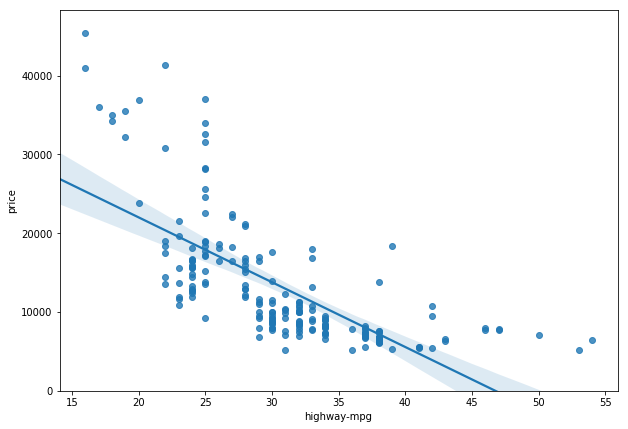

In [45]:
width = 10
height = 7
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)

As we said in previous module, this plot shows negative correlation between "highway-mpg" and "price" 
since the slope is negative.
This will give you a
good indication of the variance of the data, and whether a linear model would be the best fit or
not. If the data is too far off from the line, this linear model might not be the best model for this
data. Let’s compare this plot to the regression plot of "peak-rpm".

(0, 47426.697670214446)

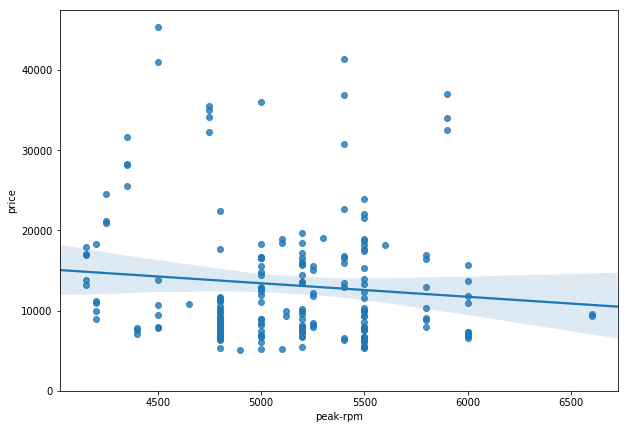

In [46]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)

By comparing this 2 plot we can see the points from "highway-mpg" are much fitter than "peak-rpm".
The points for
"peak-rpm" have more spread around the predicted line, and it is much harder to determine if the
points are decreasing or increasing as the "highway-mpg" increases.


### Residual Plot

Another good way to visualize the variance of the data.The difference between the observed value (y) and the predicted value (Yhat) is called the
residual (e).

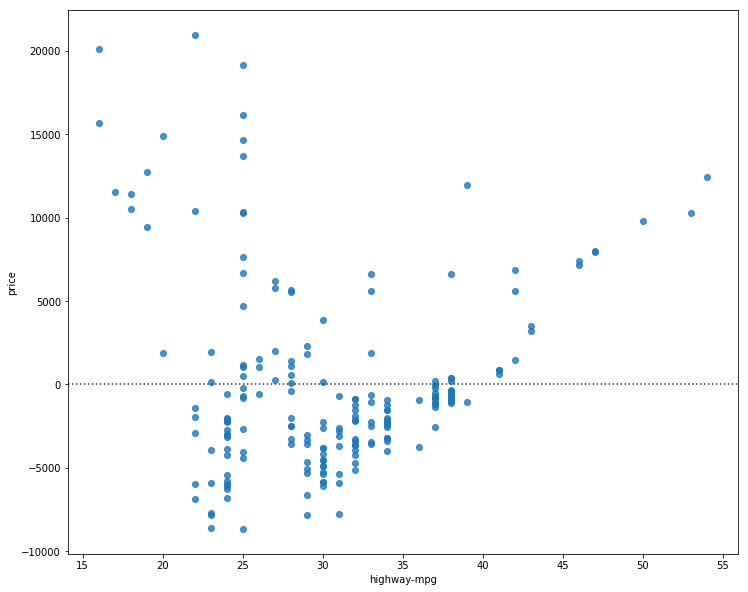

In [49]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

So, what we can understand from this plot?

We can see from this residual plot that the residuals are not randomly spread around the x-axis,
which leads us to believe that maybe a non-linear model is more appropriate for this data.

### Multiple Linear Regression

Miltiple Linear Regression Visualisation is different from Simple Linear Regression. We cant use regplot or residualplot here. Thus this is a bit complicated.

First lets make a prediction

In [51]:
Yhat  = lm.predict(features)

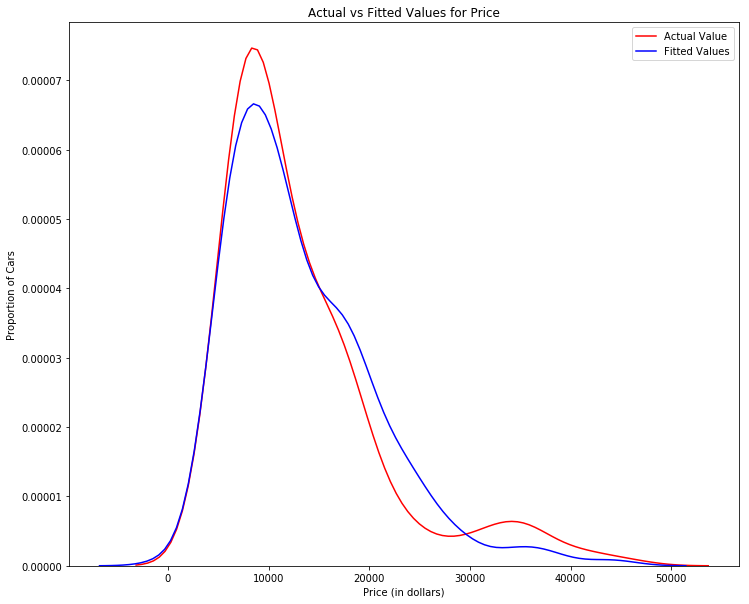

In [53]:
plt.figure(figsize=(width, height))
ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)
plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')
plt.show()
plt.close()

We can recognize from plot that fitted values are significantly close to the actual values.

### Polynomial Regression and Pipelines

is a particular case of the general linear regression model or multiple linear
regression models. We get non-linear relationships by squaring or setting higher-order terms of
the predictor variables.
There are different orders of polynomial regression:

### Quadratic Order
### $Yhat =   W_1 X^2 + W_2 X^2 + b $

### Cubic

### $Yhat =   W_1 X^2 + W_2 X^2 +W_3 X^3 + b $

### Higher order

### $Yhat =   W_1 X^2 + W_2 X^2 +W_3 X^3 ... $

As illustrates linear model did not work very well while using highway-mpg as
the predictor variable. Now we try to use polynomial model.
The following function used to plot the data.

In [67]:
def PlotPolly(model,independent_variable,dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)
    plt.plot(independent_variable,dependent_variabble,'.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    #ax.set_axis_bgcolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')
    plt.show()
    plt.close()

In [68]:
# lets get the variables
x = df['highway-mpg']
y = df['price']

Let’s fit the polynomial using the function polyfit, then use the function poly1d to display the
polynomial function.

In [69]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.552 x + 204.2 x - 8948 x + 1.378e+05


Let’s plot the function

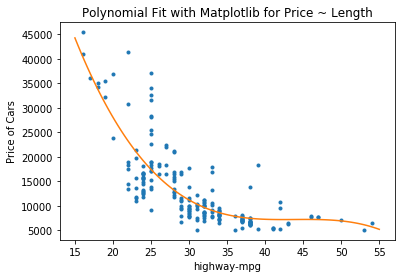

In [70]:
PlotPolly(p,x,y, 'highway-mpg')

In [66]:
np.polyfit(x, y, 3)

array([-1.55173297e+00,  2.04232144e+02, -8.94817574e+03,  1.37751367e+05])

Also it is possible to use polynomial transform on some features. First, we import the module:

In [71]:
from sklearn.preprocessing import PolynomialFeatures

In [74]:
# We create a PolynomialFeatures object of degree 2:

pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)

In [82]:
features_pr=pr.fit_transform(features)

In [83]:
features.shape

(200, 4)

In [84]:
features_pr.shape

(200, 15)

### Pipeline

Data Pipelines simplify the steps of processing the data. We use the module Pipeline to create a
pipeline. We also use StandardScaler as a step in our pipeline.

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

We create the pipeline, by creating a list of tuples including the name of the model or estimator
and its corresponding constructor.

In [88]:
Input=[('scale',StandardScaler()),('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [89]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [91]:
pipe.fit(features,y)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('polynomial', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)), ('model', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [92]:
ypipe=pipe.predict(features)
ypipe[0:4]

/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


array([13095.3683245 , 18224.95716349, 10388.16455605, 16123.27954832])

### Measures for evaluation

To evaluating the model we need another measure as well as visualization to calculate how the model is accurate
two measures are:
   - $R^2$/ R-squared
   - Mean Square Error(MSE)

### R-squared

is a measure to indicate how close
the data is to the fitted regression line.The value of the R-squared is the percentage of variation
of the response variable (y) that is explained by a linear model.

### Mean Square Error, Quadratic loss, L2 Loss

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the sum of squared distances between our target variable and predicted values.
The Mean Squared Error measures the average of the squares of errors, that is, the difference
between actual value (y) and the estimated value ().

#### Let’s calculate the Rˆ2

In [95]:
#highway_mpg_fit
lm.fit(X, Y)
# Find the R^2
lm.score(X, Y)

0.49718675257265266

#### lets import the function mean_squared_error from the module metrics

In [96]:
from sklearn.metrics import mean_squared_error

In [97]:
mean_squared_error(df['price'], Yhat)

12036316.242744623

#### Model 2

##### Let’s calculate the Rˆ2

In [100]:
lm.fit(features, df['price'])
# Find the R^2
lm.score(features, df['price'])

0.8094176067158594

We can say that ~ 80.896 % of the variation of price is explained by this multiple linear regres-
sion "multi_fit".

#####  Let’s calculate the MSE

In [102]:
Y_predict_multifit = lm.predict(features)

In [103]:
mean_squared_error(df['price'], Y_predict_multifit)

12036316.242744623

##### When comparing models, the model with the higher R-squared value is a better fit for the data.
##### When comparing models, the model with the smallest MSE value is a better fit for the data.

### Mean Absolute Error, L1 Loss

Mean Absolute Error (MAE) is another loss function used for regression models. MAE is the sum of absolute differences between our target and predicted variables. So it measures the average magnitude of errors in a set of predictions, without considering their directions. (If we consider directions also, that would be called Mean Bias Error (MBE), which is a sum of residuals/errors). The range is also 0 to ∞.

### MSE vs. MAE (L2 loss vs L1 loss)

In short, using the squared error is easier to solve, but using the absolute error is more robust to outliers. But let’s understand why!

Whenever we train a machine learning model, our goal is to find the point that minimizes loss function. Of course, both functions reach the minimum when the prediction is exactly equal to the true value.

In [106]:
# true: Array of true target variable
# pred: Array of predictions

def mse(true, pred): 
    return np.sum((true - pred)**2)
    
def mae(true, pred):
    return np.sum(np.abs(true - pred))
 
 # also available in sklearn
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

Let’s see the values of MAE and Root Mean Square Error (RMSE, which is just the square root of MSE to make it on the same scale as MAE) for 2 cases. In the first case, the predictions are close to true values and the error has small variance among observations. In the second, there is one outlier observation, and the error is high.

### What do we observe from this, and how can it help us to choose which loss function to use?
Since MSE squares the error (y — y_predicted = e), the value of error (e) increases a lot if e > 1. If we have an outlier in our data, the value of e will be high and e² will be >> |e|. This will make the model with MSE loss give more weight to outliers than a model with MAE loss. In the 2nd case above, the model with RMSE as loss will be adjusted to minimize that single outlier case at the expense of other common examples, which will reduce its overall performance.

#### MAE
loss is useful if the training data is corrupted with outliers (i.e. we erroneously receive unrealistically huge negative/positive values in our training environment, but not our testing environment).

Intuitively, we can think about it like this: If we only had to give one prediction for all the observations that try to minimize MSE, then that prediction should be the mean of all target values. But if we try to minimize MAE, that prediction would be the median of all observations. We know that median is more robust to outliers than mean, which consequently makes MAE more robust to outliers than MSE.

### Deciding which loss function to use
If the outliers represent anomaly that are important for business and should be detected, then we should use MSE. On the other hand, if we believe that the outliers just represent corrupted data, then we should choose MAE as loss.

I recommend reading this post with a nice study comparing the performance of a regression model using L1 loss and L2 loss in both the presence and absence of outliers. Remember, L1 and L2 loss are just another names for MAE and MSE respectively.

   L1 loss is more robust to outliers, but its derivatives are not continuous, making it inefficient to find the solution. L2 loss is sensitive to outliers, but gives a more stable and closed form solution (by setting its derivative to 0.)